### 1 min Data Download from Google 
### https://github.com/parthasen/ALGO/blob/MIX/google_data

In [649]:
import pandas as pd
import numpy as np
import urllib2
import urllib
import datetime
import datetime as dt
from datetime import datetime
from pytz import timezone
import pytz
from time import gmtime, strftime
import time
import os
from random import randint
import math
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline

In [658]:
def get_google_data(symbol, period, window):
    url_root = 'http://www.google.com/finance/getprices?i='
    url_root += str(period) + '&p=' + str(window)
    url_root += 'd&f=d,o,h,l,c,v&df=cpct&q=' + symbol
    response = urllib2.urlopen(url_root)
    data = response.read().split('\n')
    #actual data starts at index = 7
    #first line contains full timestamp,
    #every other line is offset of period from timestamp
    parsed_data = []
    anchor_stamp = ''
    end = len(data)
    for i in range(7, end):
        cdata = data[i].split(',')
        if 'a' in cdata[0]:
            #first one record anchor timestamp
            anchor_stamp = cdata[0].replace('a', '')
            cts = int(anchor_stamp)
        else:
            try:
                coffset = int(cdata[0])
                cts = int(anchor_stamp) + (coffset * period)
                parsed_data.append((dt.datetime.fromtimestamp(float(cts)), float(cdata[1]), float(cdata[2]), float(cdata[3]), float(cdata[4]), float(cdata[5])))
            except:
                pass # for time zone offsets thrown into data
    df = pd.DataFrame(parsed_data)
    df.columns = ['ts', 'o', 'h', 'l', 'c', 'v']
    df.index = df.ts
    del df['ts']
    return df

In [667]:
# another function
def google_finance_datareader(symbol, interval_seconds, num_days):
    url_string = "http://www.google.com/finance/getprices?q={symbol}".format(symbol=symbol.upper())
    url_string += "&i={interval_seconds}&p={num_days}d&f=d,o,h,l,c,v".format(interval_seconds=interval_seconds, num_days=num_days)
    #print(url_string)
    page = urllib.urlopen(url_string)
    df = pd.read_csv(page, skiprows=7, sep=',', names=['DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'])
    b_dateround = df['DATE'].map(lambda dt: dt[0]=='a')
    dateround = df[b_dateround]['DATE'].map(lambda dt: int(dt[1:]))
    df['DATE2'] = dateround
    df['DATE2'] = df['DATE2'].fillna(method='ffill')
    df['DATE3'] = df[~b_dateround]['DATE'].astype(int)*interval_seconds
    df['DATE3'] = df['DATE3'].fillna(0)
    df['DATE4'] = df['DATE2'] + df['DATE3']
    df['DATE4'] = df['DATE4'].map(lambda s: dt.datetime.fromtimestamp(int(s), pytz.UTC))
    del df['DATE']
    del df['DATE2']
    del df['DATE3']
    df = df.set_index('DATE4', verify_integrity=True)
    df.index.name = 'DATE'
    return(df)

In [670]:
spy = get_google_data('SPY',60, 20)
spy.to_csv('/home/octo/Desktop/PROJECT/DATA/RPy/data.csv',sep=',')

In [666]:
spy.tail()

,o,h,l,c,v
ts,,,,,
2016-08-27 01:26:00,217.22,217.235,217.12,217.12,129652
2016-08-27 01:27:00,217.20,217.240,217.12,217.22,237110
2016-08-27 01:28:00,217.20,217.200,217.17,217.20,107396
2016-08-27 01:29:00,217.25,217.310,217.19,217.19,205871
2016-08-27 01:30:00,217.28,217.310,217.18,217.26,2184335


In [484]:
spy = get_google_data('SPY',60, 10)
sqqq = get_google_data('SQQQ',60, 10)
uwti = get_google_data('UWTI',60, 10)
vxx = get_google_data('VXX',60, 10)
dia= get_google_data('DIA',60, 10)
ndx= get_google_data('NDX',60, 10)
oex= get_google_data('OEX',60, 10)
xle= get_google_data('XLE',60, 10)
xlf= get_google_data('XLF',60, 10)
xlv= get_google_data('XLV',60, 10)
xly= get_google_data('XLY',60, 10)
xli= get_google_data('XLI',60, 10)

In [651]:
symbol = 'spy'
interval_seconds = 60
num_days = 30
df = google_finance_datareader(symbol, interval_seconds, num_days)

 http://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
 
 https://www.talaikis.com/bayes-theorem-in-simple-words-and-bayesian-expected-returns-estimation-using-python/
 
  
 Naive Bayes
 
 Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method.

2. Summarize Data

We can break the preparation of this summary data down into the following sub-tasks:

    Separate Data By Class
    Calculate Mean
    Calculate Standard Deviation
    Summarize Dataset
    Summarize Attributes By Class

1. Split a given dataset into a given split ratio

ML

http://francescopochetti.com/stock-market-prediction-part-ii-feature-generation/

In [216]:
import cPickle
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import operator
import pandas.io.data
from sklearn.qda import QDA
import re
from dateutil import parser
#from backtest import Strategy, Portfolio

FEATURE generation

Day return,Multiple day return,returns moving average,time lagged returns

In [375]:
df= pd.DataFrame(data=spy.c)

In [376]:
df['ret_spy'] = pd.DataFrame(data=spy.c.pct_change(2).shift(-1))
df['ret_sqqq'] = pd.DataFrame(data=sqqq.c.pct_change(2).shift(-1))
df['ret_uwti'] = pd.DataFrame(data=uwti.c.pct_change(2).shift(-1))
df['ret_vxx'] = pd.DataFrame(data=vxx.c.pct_change(2).shift(-1))
df['ret_dia'] = pd.DataFrame(data=dia.c.pct_change(2).shift(-1))
df['ret_ndx'] = pd.DataFrame(data=ndx.c.pct_change(2).shift(-1))
df['ret_oex'] = pd.DataFrame(data=oex.c.pct_change(2).shift(-1))
df['ret_xle'] = pd.DataFrame(data=xle.c.pct_change(2).shift(-1))
df['ret_xlf'] = pd.DataFrame(data=xlf.c.pct_change(2).shift(-1))
df['ret_xlv'] = pd.DataFrame(data=xlv.c.pct_change(2).shift(-1))
df['ret_xly'] = pd.DataFrame(data=xly.c.pct_change(2).shift(-1))
df['ret_xli'] = pd.DataFrame(data=xli.c.pct_change(2).shift(-1))

In [377]:
df['mean_spy'] = pd.rolling_mean(df.ret_spy, 5)
df['mean_sqqq'] = pd.rolling_mean(df.ret_sqqq, 5)
df['mean_uwti'] = pd.rolling_mean(df.ret_uwti, 5)
df['mean_vxx'] = pd.rolling_mean(df.ret_vxx, 5)
df['mean_dia'] = pd.rolling_mean(df.ret_dia, 5)
df['mean_ndx'] = pd.rolling_mean(df.ret_ndx, 5)
df['mean_oex'] = pd.rolling_mean(df.ret_oex, 5)
df['mean_xle'] = pd.rolling_mean(df.ret_xle, 5)
df['mean_xlf'] = pd.rolling_mean(df.ret_xlf, 5)
df['mean_xlv'] = pd.rolling_mean(df.ret_xlv, 5)
df['mean_xly'] = pd.rolling_mean(df.ret_xly, 5)
df['mean_xli'] = pd.rolling_mean(df.ret_xli, 5)

In [378]:
df=df.drop('c',axis=1).dropna()

In [387]:
df.tail()

,ret_spy,ret_sqqq,ret_uwti,ret_vxx,ret_dia,ret_ndx,ret_oex,ret_xle,ret_xlf,ret_xlv,...,mean_vxx,mean_dia,mean_ndx,mean_oex,mean_xle,mean_xlf,mean_xlv,mean_xly,mean_xli,UpDown
ts,,,,,,,,,,,,,,,,,,,,,
2016-08-24 20:04:00,-0.000206,0.000000,-0.004365,-0.000409,-0.000162,0.000328,0.000259,0.000429,0.000208,0.000000,...,-0.000136,5.730442e-08,0.000153,0.000044,-0.001056,0.000125,0.000161,0.000122,-6.783108e-05,1
2016-08-24 20:05:00,-0.000091,0.000000,-0.004381,0.001093,-0.000054,-0.000181,-0.000145,-0.000143,0.000000,0.000134,...,0.000082,4.330639e-05,0.000114,0.000031,-0.000714,0.000125,0.000201,0.000073,2.302872e-08,1
2016-08-24 20:06:00,0.000343,-0.000711,-0.001594,-0.000273,0.000433,-0.000018,-0.000145,0.000000,0.000000,0.000268,...,-0.000163,2.055042e-04,0.000101,0.000023,-0.000057,0.000125,0.000228,0.000073,6.787714e-05,2
2016-08-24 20:07:00,-0.000687,-0.001081,0.003200,-0.001365,0.000108,0.000319,0.000259,0.001432,0.000208,0.000000,...,-0.000464,1.730525e-04,0.000166,0.000091,0.000430,0.000125,0.000134,0.000073,1.357428e-04,1
2016-08-24 20:18:00,NaN,0.002392,0.000000,0.003816,-0.000108,-0.000667,-0.000571,-0.000716,-0.000624,-0.000537,...,0.002238,-5.082888e-04,-0.000413,-0.000409,-0.000573,-0.000499,-0.000457,-0.000392,-4.070327e-04,0


http://francescopochetti.com/wp-content/uploads/2014/09/machine_learning.png

In [391]:
def prepareDataForClassification(dataset, start_test):
    """
    generates categorical output column, attach to dataframe 
    label the categories and split into train and test
    """
    le = preprocessing.LabelEncoder()
    
    dataset['UpDown'] = dataset['ret_spy']
    dataset.UpDown[dataset.UpDown >= 0] = 'Up'
    dataset.UpDown[dataset.UpDown < 0] = 'Down'
    dataset.UpDown = le.fit(dataset.UpDown).transform(dataset.UpDown)
    
    features = dataset.columns[1:-1]
    X = dataset[features]    
    y = dataset.UpDown    
    
    X_train = X[X.index < start_test]
    y_train = y[y.index < start_test]              
    
    X_test = X[X.index >= start_test]    
    y_test = y[y.index >= start_test]
    
    return X_train, y_train, X_test, y_test   

In [392]:
X_train, y_train, X_test, y_test=prepareDataForClassification(df,'2016-08-23')

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [263]:
def performClassification(X_train, y_train, X_test, y_test, method, parameters, fout, savemodel):
    """
    performs classification on daily returns using several algorithms (method).
    method --> string algorithm
    parameters --> list of parameters passed to the classifier (if any)
    fout --> string with name of stock to be predicted
    savemodel --> boolean. If TRUE saves the model to pickle file
    """
   
    if method == 'RF':   
        return performRFClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)
        
    elif method == 'KNN':
        return performKNNClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)
    
    elif method == 'SVM':   
        return performSVMClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)
    
    elif method == 'ADA':
        return performAdaBoostClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)
    
    elif method == 'GTB': 
        return performGTBClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)
 
    elif method == 'QDA': 
        return performQDAClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel)

In [264]:
def performRFClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    Random Forest Binary Classification
    """
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [265]:
def performKNNClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    KNN binary Classification
    """
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
 
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [267]:
def performSVMClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    SVM binary Classification
    """
    c = parameters[0]
    g =  parameters[1]
    clf = SVC()
    clf.fit(X_train, y_train)
 
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [268]:
def performAdaBoostClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    Ada Boosting binary Classification
    """
    n = parameters[0]
    l =  parameters[1]
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
 
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [269]:
def performGTBClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    Gradient Tree Boosting binary Classification
    """
    clf = GradientBoostingClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
 
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [270]:
def performQDAClass(X_train, y_train, X_test, y_test, parameters, fout, savemodel):
    """
    Quadratic Discriminant Analysis binary Classification
    """
    def replaceTiny(x):
        if (abs(x) < 0.0001):
            x = 0.0001
    
    X_train = X_train.apply(replaceTiny)
    X_test = X_test.apply(replaceTiny)
    
    clf = QDA()
    clf.fit(X_train, y_train)
 
    if savemodel == True:
        fname_out = '{}-{}.pickle'.format(fout, datetime.now())
        with open(fname_out, 'wb') as f:
            cPickle.dump(clf, f, -1)    
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

Cross Validation

In [271]:
def performFeatureSelection(maxdeltas, maxlags, fout, cut, start_test, path_datasets, savemodel, method, folds, parameters):
    """
    Performs Feature selection for a specific algorithm
    """
    
    for maxlag in range(3, maxlags + 2):
        lags = range(2, maxlag) 
        print ''
        print '============================================================='
        print 'Maximum time lag applied', max(lags)
        print ''
        for maxdelta in range(3, maxdeltas + 2):
            datasets = loadDatasets(path_datasets, fout)
            delta = range(2, maxdelta) 
            print 'Delta days accounted: ', max(delta)
            datasets = applyRollMeanDelayedReturns(datasets, delta)
            finance = mergeDataframes(datasets, 6, cut)
            print 'Size of data frame: ', finance.shape
            print 'Number of NaN after merging: ', count_missing(finance)
            finance = finance.interpolate(method='linear')
            print 'Number of NaN after time interpolation: ', count_missing(finance)
            finance = finance.fillna(finance.mean())
            print 'Number of NaN after mean interpolation: ', count_missing(finance)    
            finance = applyTimeLag(finance, lags, delta)
            print 'Number of NaN after temporal shifting: ', count_missing(finance)
            print 'Size of data frame after feature creation: ', finance.shape
            X_train, y_train, X_test, y_test  = prepareDataForClassification(finance, start_test)
            
            print performCV(X_train, y_train, folds, method, parameters, fout, savemodel)
            print ''

In [404]:
performClassification(X_train, y_train, X_test, y_test,'KNN','','SPY','FALSE')

0.50847457627118642

K means intesive research

In [405]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

In [416]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=8, random_state=1)
# Fit the model using the good columns.
kmeans_model.fit(X_train,y_train)
# Get the cluster assignments.
labels = kmeans_model.labels_

In [417]:
accuracy =kmeans_model.score(X_test, y_test)

In [418]:
accuracy

-0.0015756909811929464

KNN

In [432]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [433]:
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [434]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

In [435]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.47      0.52      0.49        27
          2       0.55      0.52      0.53        31

avg / total       0.50      0.51      0.51        59

[[ 0  1  0]
 [ 0 14 13]
 [ 0 15 16]]


In [436]:
accuracy =model.score(X_test, y_test) 
accuracy

0.50847457627118642

 PCA takes multiple columns, and turns them into fewer columns while trying to preserve the unique information in each column. Dimensionality reduction techniques like PCA are widely used when preprocessing data for machine learning algorithms.

In [420]:
# Import the PCA model.
from sklearn.decomposition import PCA

In [421]:
# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(X_train)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [423]:
df.corr()['ret_spy']# around 20% correlation

ret_spy      1.000000
ret_sqqq    -0.277642
ret_uwti     0.098874
ret_vxx     -0.245318
ret_dia      0.268160
ret_ndx      0.235390
ret_oex      0.234909
ret_xle      0.112450
ret_xlf      0.234065
ret_xlv      0.263004
ret_xly      0.261403
ret_xli      0.205507
mean_spy     0.079039
mean_sqqq   -0.078610
mean_uwti    0.021013
mean_vxx    -0.068450
mean_dia     0.084766
mean_ndx     0.103389
mean_oex     0.094920
mean_xle     0.053404
mean_xlf     0.073148
mean_xlv     0.063772
mean_xly     0.037034
mean_xli     0.056012
UpDown       0.656860
Name: ret_spy, dtype: float64

choosing correct parameters

In [450]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

In [451]:
# prepare a range of alpha values to test
alphas = np.array([0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0])

In [452]:
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.001 ,  0.0011,  0.0012,  0.0013,  0.0014,  0.0015,  0.    ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [453]:
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.0575737572557
0.001


In [454]:
accuracy =grid.score(X_test, y_test) 
accuracy

0.004780300938992732

ARCH Modeling

http://nbviewer.jupyter.org/github/bashtage/arch/blob/master/examples/univariate_volatility_modeling.ipynb

Unit Root Testing

http://nbviewer.jupyter.org/github/bashtage/arch/blob/master/examples/unitroot_examples.ipynb

In [488]:
import datetime as dt
import pandas as pd
import statsmodels.api as sm

In [489]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

In [512]:
oex.isnull().any()

o    False
h    False
l    False
c    False
v    False
dtype: bool

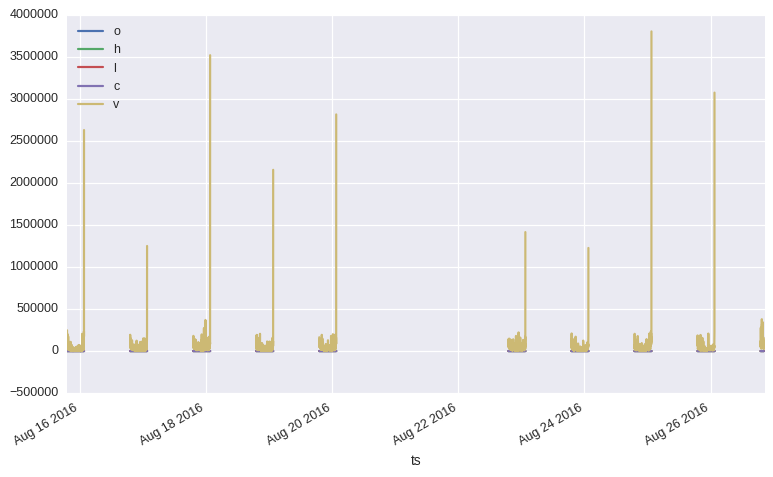

In [518]:
default = spy - oex
fig = default.plot()

In [519]:
default.dtypes

o    float64
h    float64
l    float64
c    float64
v    float64
dtype: object

In [506]:
default.isnull().any()#Will return the feature with True or False,True means have missing value else False

o    True
h    True
l    True
c    True
v    True
dtype: bool

In [522]:
default.head()

,o,h,l,c,v
ts,,,,,
2016-08-15 19:01:00,-746.368431,-746.418938,-746.317346,-746.36815,44563.704895
2016-08-15 19:02:00,-749.490000,-749.510000,-749.210000,-749.31000,246097.000000
2016-08-15 19:03:00,-749.180000,-749.430000,-749.180000,-749.43000,105692.000000
2016-08-15 19:04:00,-749.320000,-749.370000,-749.170000,-749.20000,45636.000000
2016-08-15 19:05:00,-749.460000,-749.470000,-749.320000,-749.32000,78269.000000


In [523]:
#Impute numerical missing values with mean
default = default.fillna(default.mean(),inplace=True)

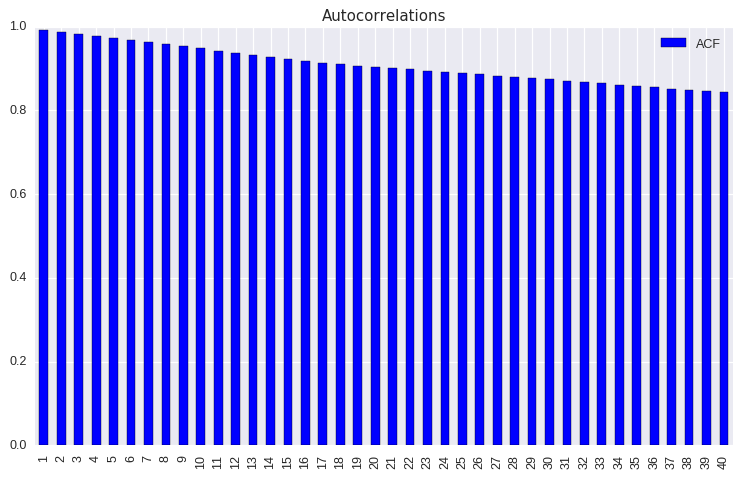

In [524]:
acf = pd.DataFrame(sm.tsa.stattools.acf(default.c), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

Agumented Dickey-Fuller Testing

 It is a regression of the first difference of the variable on its lagged level as well as additional lags of the first difference. The null is that the series contains a unit root, and the (one-sided) alternative is that the series is stationary.

In [526]:
from arch.unitroot import ADF
adf = ADF(default.c)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.748
P-value                         0.066
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [527]:
#Setting the number of lags
adf.lags = 5
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.128
P-value                         0.025
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Deterministic terms

The deterministic terms can be altered using trend. The options are:

'nc' : No deterministi terms
'c' : Constant only
'ct' : Constant and time trend
'ctt' : Constant, time trend and time-trend squared
Changing the type of constant also makes no difference for this data.

In [528]:
adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.832
P-value                         0.015
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Regression output

In [529]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     20.00
Date:                Sun, 28 Aug 2016   Prob (F-statistic):           1.65e-26
Time:                        09:39:49   Log-Likelihood:                -64.434
No. Observations:                3740   AIC:                             144.9
Df Residuals:                    3732   BIC:                             194.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0102      0.003     -3.832      0.0

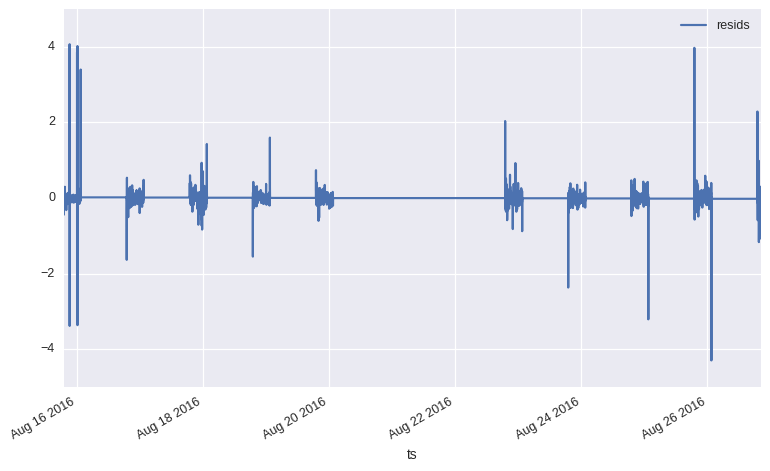

In [530]:
import pandas as pd
import matplotlib.pyplot as plt
resids = pd.DataFrame(reg_res.resid, index=default.index[6:], columns=['resids'])
fig = resids.plot()

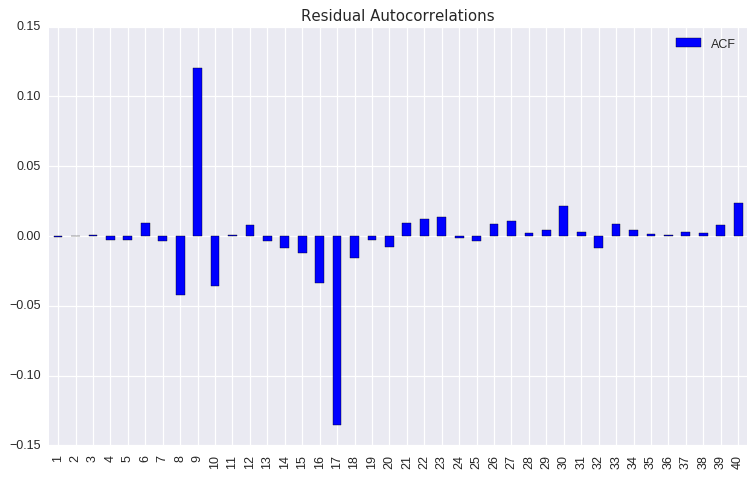

In [531]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Residual Autocorrelations')

Dickey-Fuller GLS Testing

The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. This test is only available with a constant or constant and time trend (trend='c' or trend='ct').

In [532]:
from arch.unitroot import DFGLS
dfgls = DFGLS(default.c)
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.747
P-value                         0.006
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [533]:
dfgls.trend = 'ct'
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.903
P-value                         0.045
Lags                               18
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.41 (1%), -2.85 (5%), -2.56 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Phillips-Perron Testing

The Phippips-Perron test is similar to the ADF except that the regression run does not include lagged values of the first differences. Instead, the PP test fixed the t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator.

In [534]:
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(default.c)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.068
P-value                         0.029
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [535]:
pp.lags = 12
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.222
P-value                         0.019
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [536]:
pp.trend = 'ct'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.461
P-value                         0.002
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Finally, the PP testing framework includes two types of tests. One which uses an ADF-type regression of the first difference on the level, the other which regresses the level on the level. The default is the tau test, which is similar to an ADF regression, although this can be changed using test_type='rho'.

In [537]:
pp.test_type = 'rho'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-rho)    
Test Statistic                -39.486
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.29 (1%), -21.68 (5%), -18.22 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


KPSS Testing

The KPSS test differs from the three previous in that the null is a stationary process and the alternative is a unit root.


In [539]:
from arch.unitroot import KPSS
kpss = KPSS(default.c)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  5.326
P-value                         0.001
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [540]:
kpss.trend = 'ct'
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.610
P-value                         0.001
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Variance Ratio Testing


Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability.

In [541]:
from arch.unitroot import VarianceRatio
vr = VarianceRatio(default.c, 12)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -3.161
P-value                         0.002
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)


By default the VR test uses all overlapping blocks to estimate the variance of the long period's return. This can be changed by setting overlap=False. This lowers the power but doesn't change the conclusion.

 The warning is intentional. It appears here since when it is not possible to use all data since the data length isn't an integer multiple of the long period when using non-overlapping blocks. There is little reason to use overlap=False.

In [542]:
warnings.simplefilter('always')  # Restore warnings

vr.overlap = False
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -4.667
P-value                         0.000
Lags                               12
-------------------------------------

Computed with non-overlapping blocks


/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/unitroot/unitroot.py:1041: InvalidLengthWarning: 
The length of y is not an exact multiple of 12, and so the final
1 observations have been dropped.

  InvalidLengthWarning)


Bootstrap Examples

http://nbviewer.jupyter.org/github/bashtage/arch/blob/master/examples/bootstrap_examples.ipynb

In [554]:
len(spy.c)

3599

In [555]:
# make a trended sine wave
spy['wave'] = [10 * math.sin(i * 2 * math.pi / 25) + i * i /100.0 for i in range(3599)]
s = [10 * math.sin(i * 2 * math.pi / 25) + i * i /100.0 for i in range(3599)]

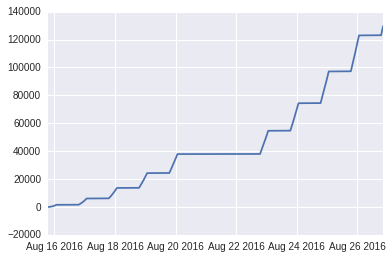

In [564]:
plt.plot(spy.wave)

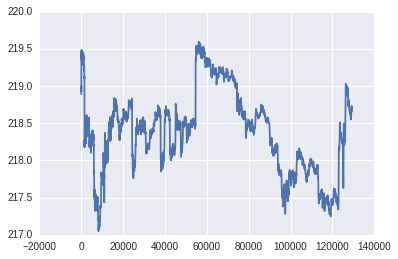

In [567]:
plt.plot(spy.wave,spy.c)

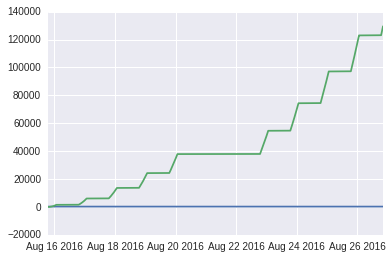

In [569]:
plt.plot(spy[['c','wave']])

Function for testing stationarity

In [570]:
import numpy as np
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts

In [571]:
def cointegration_test(y, x): 
    return ts.adfuller(stat.OLS(y, x).fit().resid)

In [588]:
spy=spy.join(oex.c,how='left',lsuffix='c').dropna()

In [598]:
c_t = cointegration_test(spy.cc,spy.c)
    
adf = c_t[0]
p = c_t[1]
critical_adf = c_t[4]['1%']
#record(adf=adf,critical_adf=critical_adf,p=p)
adf,p,critical_adf

(-1.0528615278011491, 0.73349969811769533, -3.4321840837544655)

In [601]:
ret = (spy.o/spy.cc.shift(1))-1
ret=ret.dropna()

In [610]:
ratio=spy.c/spy.cc#oex/spy

In [611]:
#https://pypi.python.org/pypi/arch/3.0
### Unit Root Tests
from arch import arch_model
am = arch_model(ratio)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -14461.3756091
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -14461.3756226
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/arch/univariate/base.py:510: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [612]:
# Function to compute parameters
def sharpe_ratio(x):
    mu, sigma = 12 * x.mean(), np.sqrt(12 * x.var())
    return np.array([mu, sigma, mu / sigma])

# Bootstrap confidence intervals
from arch.bootstrap import IIDBootstrap
bs = IIDBootstrap(ret)
ci = bs.conf_int(sharpe_ratio, 1000, method='percentile')

### Multiple Comparison Procedures

In [613]:
ci

array([[ -1.33832309e-04,   9.08471574e-04,  -1.37606784e-01],
       [  9.34794695e-05,   1.09481630e-03,   9.48887473e-02]])

In [614]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

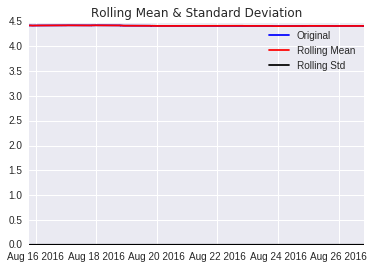

Results of Dickey-Fuller Test:
Test Statistic                   -1.050543
p-value                           0.734387
#Lags Used                        6.000000
Number of Observations Used    3568.000000
Critical Value (5%)              -2.862350
Critical Value (1%)              -3.432184
Critical Value (10%)             -2.567201
dtype: float64


In [615]:
test_stationarity(ratio)

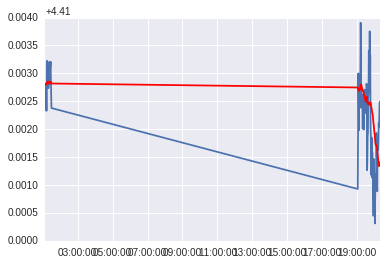

In [619]:
moving_avg = pd.rolling_mean(ratio,30)
plt.plot(ratio.tail(100))
plt.plot(moving_avg.tail(100), color='red')